# Employee churn analysis

# Introduction-


Employee churn can be defined as a leak or departure of an intellectual asset from a company or organization. or in simple words, you can say, when employees leave the organization is known as churn. another definition can be when a member of a population leaves a population, which is known as churn.
In Research, it was found that employee churn will be affected by age, tenure, pay, job satisfaction, salary, working conditions, growth potential, and employee perceptions of fairness. Some other variables such as age, gender, ethnicity, education, and marital status, were essential factors in the prediction of employee churn. In some cases such as the employee with a niche, skills are harder to replace. It affects the ongoing work and productivity of existing employees. Acquiring new employees as a replacement has its own costs like hiring costs and training costs
Also, the new employee will take time to learn skills at a similar level of technical or business expertise knowledge as an older employee. Organizations tackle this problem by applying machine learning techniques to predict employee churn, which helps them in taking necessary actions.

The following points help you to understand, employee and customer churn in a better way:
•The business chooses the employee to hire someone while in marketing you don’t get to choose your customers.
•Employees will be the face of your company, and collectively, the employees produce everything your company does.
•Losing a customer affects revenues and brand image. acquiring new customers is difficult and costly compared to retaining existing customers. Employee churn is also painful for companies in organizations. It requires time and effort to find and train a replacement.
Employee churn has unique dynamics compared to customer churn. It helps us in designing better employee retention plans and improving employee satisfaction. Data science algorithms can predict future churn


Precision: Precision is about being precise i.e. How precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Gradient Boosting model predicted an employee is going to leave, that employee actually left 95% time.
Recall: If there is an employee who actually left present in the test set and your Gradient Boosting model is able to identify it 92% of the 
time.

In [1]:
#import modules
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pandas.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Evaluation :
    This dataset has 14999 samples, and 10 attributes(6 integers, 2 float, and 2 objects).
    No variable column has null/missing values.
    satisfaction_level:  It is the employee satisfaction point, which ranges from 0–1.
# last_evaluation:     
    It is evaluated performance by the employer, which also ranges from 0–1.
    number_projects:     How many numbers of projects are assigned to an employee?
    average_monthly_hours:  How many average numbers of hours are worked by an employee in a month?
    time_spent_company:   time_spent_company means employee experience. The number of years spent by an employee in the company.
    work_accident:      Whether an employee has had a work accident or not.
    promotion_last_5years:    Whether an employee has had a promotion in the last 5 years or not.
    sales:    Employee’s working department/division.
    Salary:    Salary level of the employee such as low, medium, and high.
    left:     Whether the employee has left the company or not.

In [20]:
left=data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


In [7]:
data.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

# Number of Projects

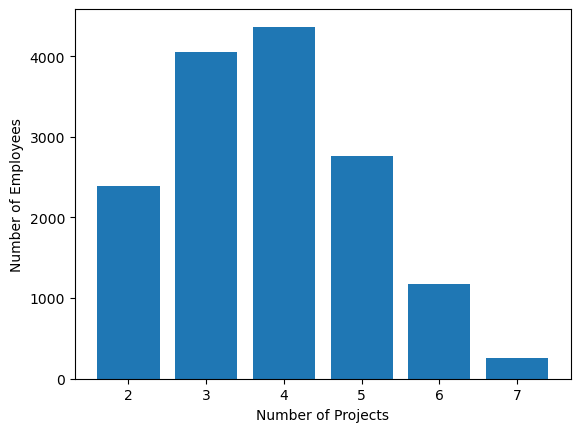

In [8]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
##Most of the employee is doing the project from 3–5

# Time Spent in Company

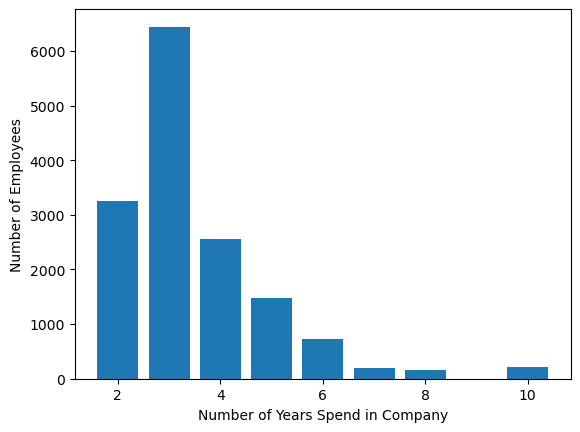

In [9]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
##Most of the employee experience is between 2–4 years. Also, there is a huge gap between 3 years and 4 years of experienced employees.

# Subplots using Seaborn

C:\Users\Admin\AppData\Local\Temp\ipykernel_9104\2912032442.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


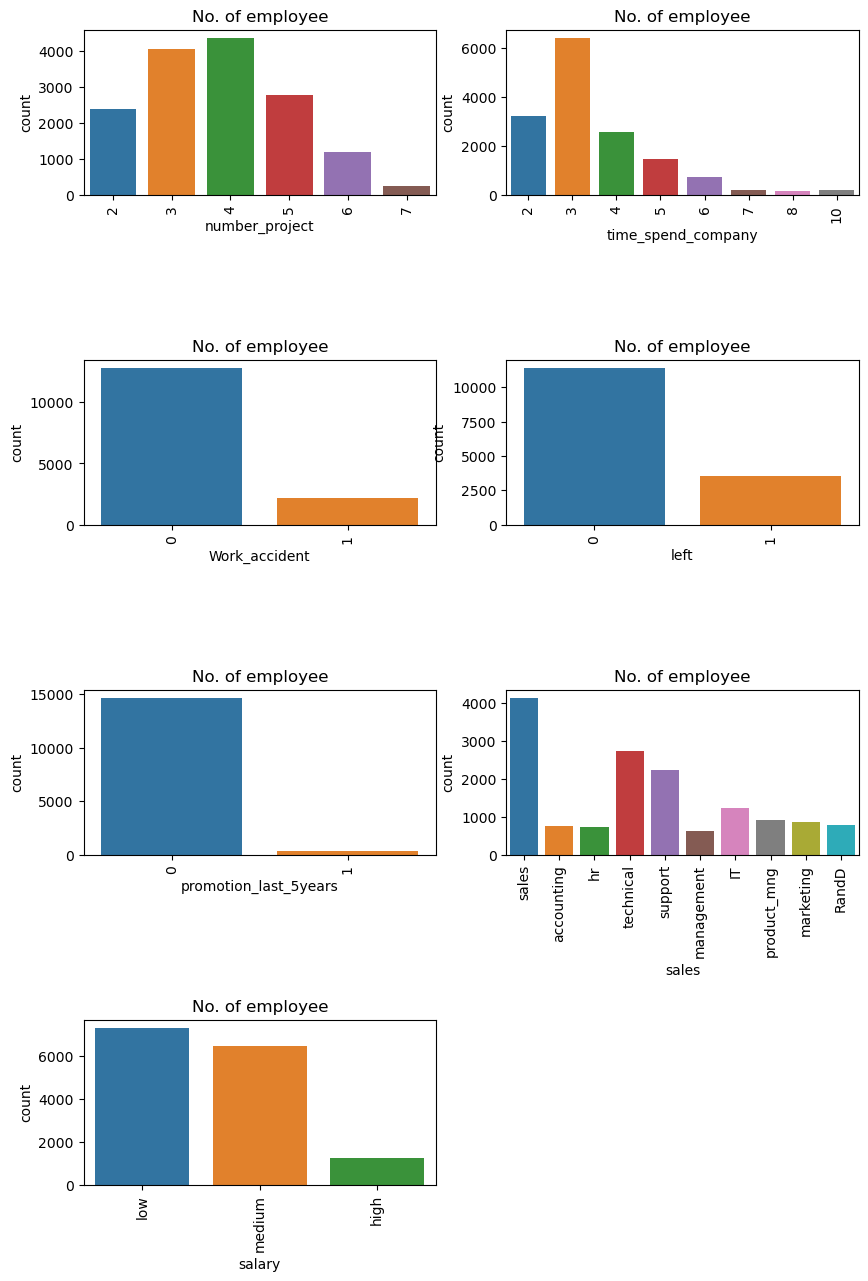

In [10]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data)
     plt.xticks(rotation=90)
     plt.title("No. of employee")

In [ ]:
#Most of the employee is doing the project from 3–5.
#There is a huge drop between 3 years and 4 years of experienced employees.
#The no of employees left is 23 % of the total employment.
#A very less number of employees get a promotion in the last 5 years.
#The sales department is having a maximum no.of employees followed by technical and support
#Most of the employees are getting a salary either medium or low.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9104\2887496995.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


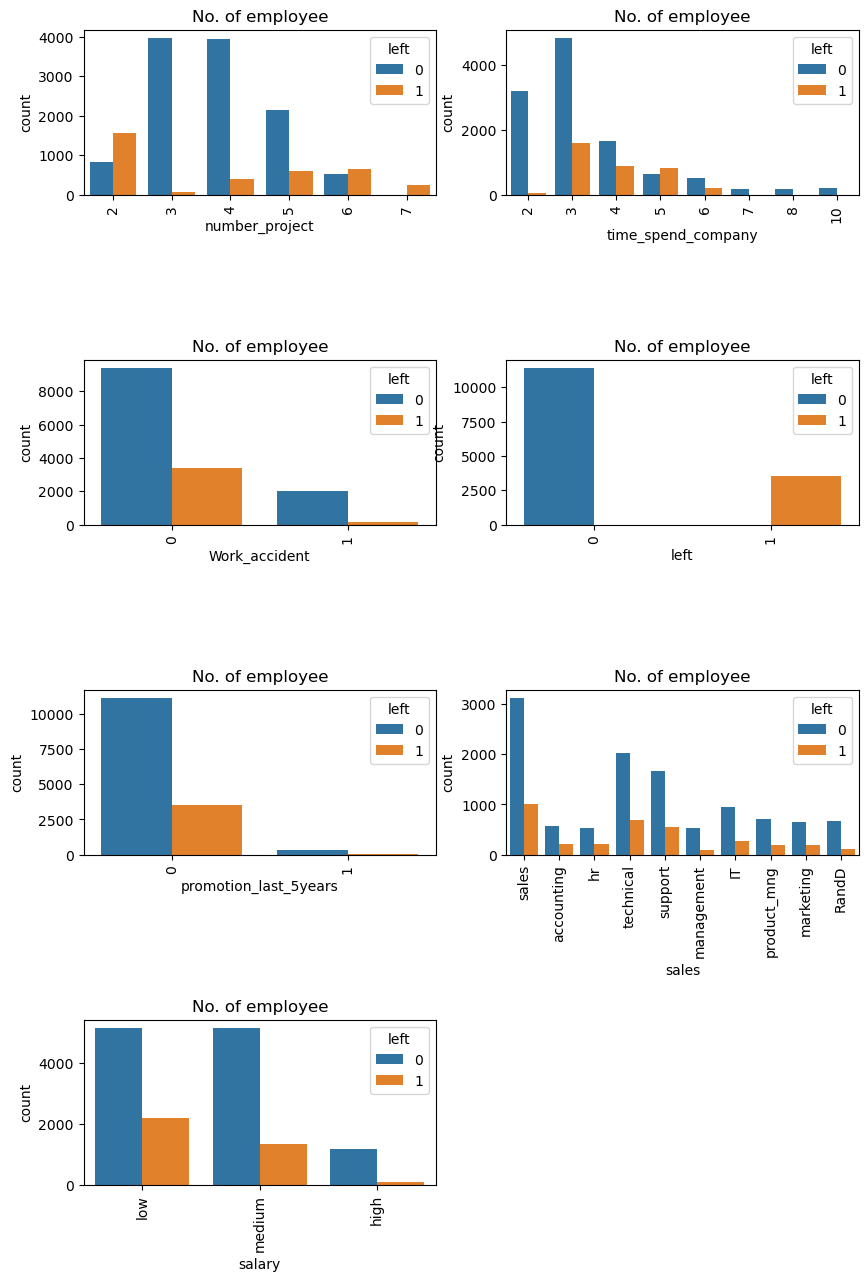

In [11]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data, hue='left')
     plt.xticks(rotation=90)
     plt.title("No. of employee")

In [ ]:
#Those employees who have a number of projects more than 5 were left the company.
#Employees who have done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
#Employees with five-year experience are leaving more because of no promotions in the last 5 years and more than 6 years of experience is not leaving because of affection with the company.
#Those who promotion in the last 5 years, didn’t leave i.e All those who left didn’t get the promotion in the last 5 years.

# Cluster analysis:
Let’s find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. so let’s bunch them into groups of people using cluster analysis.

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


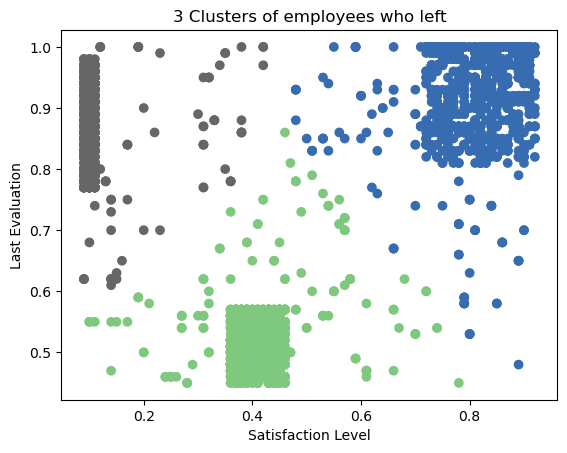

In [12]:
#import module
from sklearn.cluster import KMeans

# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [ ]:
#Here, Employees who left the company can be grouped into 3 types of employees:

#High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
#Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
#Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them ‘Bad match’

# Building prediction model
Pre-Processing Data
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Salary column’s value can be represented as low:0, medium:1, and high:2.

This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [14]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

In [ ]:
###Here, imported the preprocessing module and created the Label Encoder object. Using this LabelEncoder object you fit and transform the “salary” and “Departments “columns into the numeric column.

# Split train and test set
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let’s split the dataset by using the function train_test_split(). you need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state in order to get the same kind of train and test set.

In [15]:
# Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
y=data['left']
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [ ]:
###Here, the Dataset is broken into two parts in the ratio of 70:30. It means 70% of the data will be used for model training and 30% for model testing.

# Model Building

In [16]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train the model using the training sets
gb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gb.predict(X_test)

# Evaluating model performance

In [17]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


# Precision:
    Precision is about being precise i.e. How precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Gradient Boosting model predicted an employee is going to leave, that employee actually left 95% time.

# Recall:
    If there is an employee who actually left present in the test set and your Gradient Boosting model is able to identify it 92% of the time.